In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set2')

In [2]:
train_df = pd.read_csv('D:/datasets/riiid/train.csv', low_memory=False, nrows=10**5, 
                       dtype={'row_id': 'int64', 'timestamp': 'int64', 'user_id': 'int32', 'content_id': 'int16', 'content_type_id': 'int8',
                              'task_container_id': 'int16', 'user_answer': 'int8', 'answered_correctly': 'int8', 'prior_question_elapsed_time': 'float32', 
                             'prior_question_had_explanation': 'boolean',
                             })
train_df.head()

row_id  timestamp  user_id  content_id  content_type_id  task_container_id  \
0       0          0      115        5692                0                  1   
1       1      56943      115        5716                0                  2   
2       2     118363      115         128                0                  0   
3       3     131167      115        7860                0                  3   
4       4     137965      115        7922                0                  4   

   user_answer  answered_correctly  prior_question_elapsed_time  \
0            3                   1                          NaN   
1            2                   1                      37000.0   
2            0                   1                      55000.0   
3            0                   1                      19000.0   
4            1                   1                      11000.0   

   prior_question_had_explanation  
0                            <NA>  
1                           False  
2                           False  
3                           False  
4                           False

In [4]:
test_df = pd.read_csv('D:/datasets/riiid/example_test.csv')
test_df.head()

row_id  group_num    timestamp     user_id  content_id  content_type_id  \
0       0          0            0   275030867        5729                0   
1       1          0  13309898705   554169193       12010                0   
2       2          0   4213672059  1720860329         457                0   
3       3          0  62798072960   288641214       13262                0   
4       4          0  10585422061  1728340777        6119                0   

   task_container_id  prior_question_elapsed_time  \
0                  0                          NaN   
1               4427                      19000.0   
2                240                      17000.0   
3                266                      23000.0   
4                162                      72400.0   

  prior_question_had_explanation prior_group_answers_correct  \
0                            NaN                          []   
1                           True                         NaN   
2                           True                         NaN   
3                           True                         NaN   
4                           True                         NaN   

  prior_group_responses  
0                    []  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN

timestamp, user_id, content_id, content_type_id, task_container_id, prior_question_elapsed_time, prior_question_had_explanation

In [5]:
train_df = train_df.drop(['row_id', 'user_answer'], axis=1)
train_df.head()

timestamp  user_id  content_id  content_type_id  task_container_id  \
0          0      115        5692                0                  1   
1      56943      115        5716                0                  2   
2     118363      115         128                0                  0   
3     131167      115        7860                0                  3   
4     137965      115        7922                0                  4   

   answered_correctly  prior_question_elapsed_time  \
0                   1                          NaN   
1                   1                      37000.0   
2                   1                      55000.0   
3                   1                      19000.0   
4                   1                      11000.0   

   prior_question_had_explanation  
0                            <NA>  
1                           False  
2                           False  
3                           False  
4                           False

<AxesSubplot:>

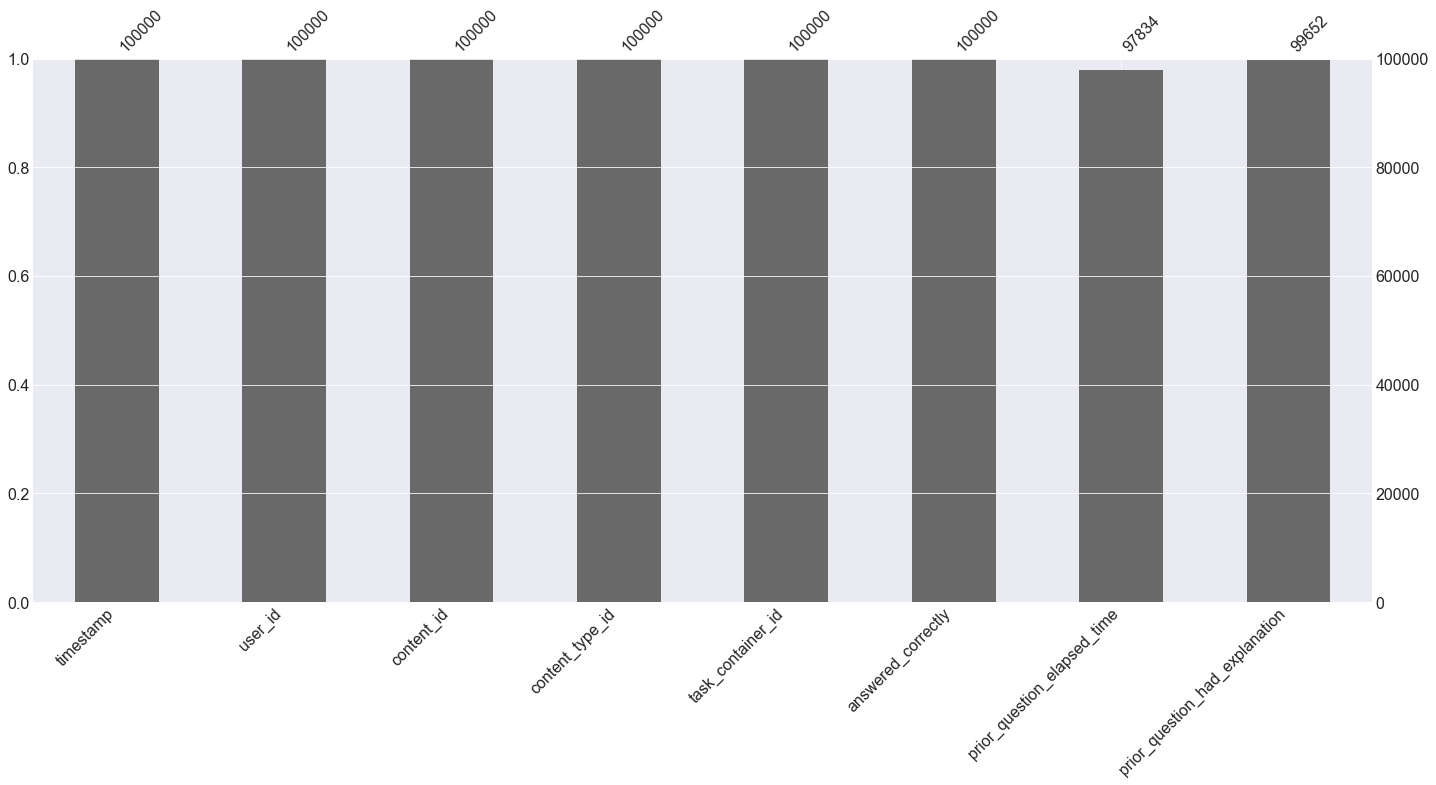

In [6]:
import missingno as msn
msn.bar(train_df)

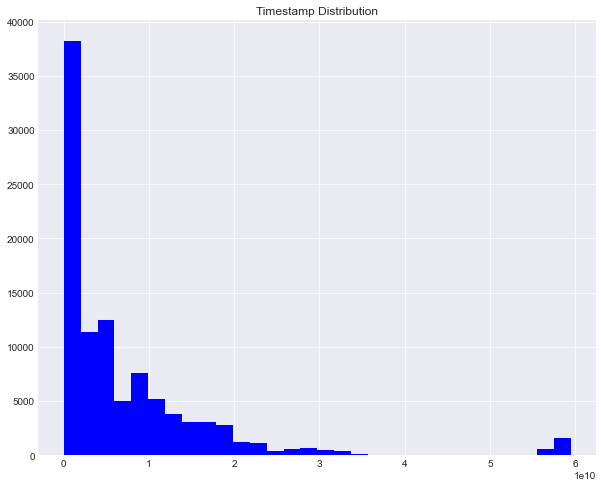

In [7]:
plt.figure(figsize=(10, 8))
plt.title("Timestamp Distribution")
plt.hist(train_df['timestamp'], color="blue", bins=30)
plt.show()

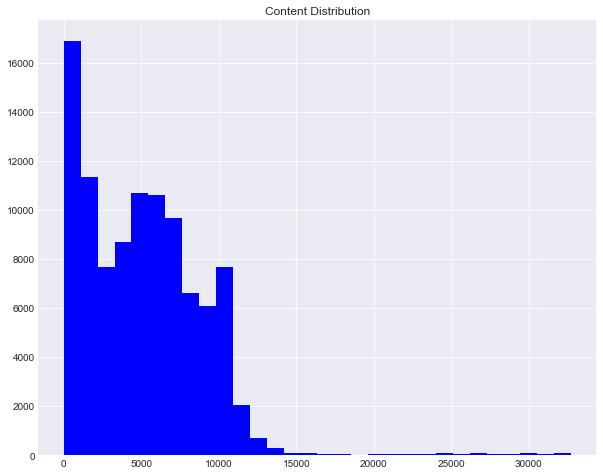

In [8]:
plt.figure(figsize=(10, 8))
plt.title("Content Distribution")
plt.hist(train_df['content_id'], color="blue", bins=30)
plt.show()

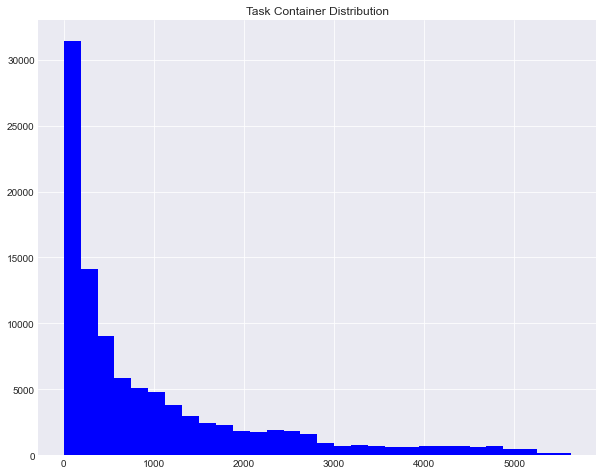

In [9]:
plt.figure(figsize=(10, 8))
plt.title("Task Container Distribution")
plt.hist(train_df['task_container_id'], color="blue", bins=30)
plt.show()

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


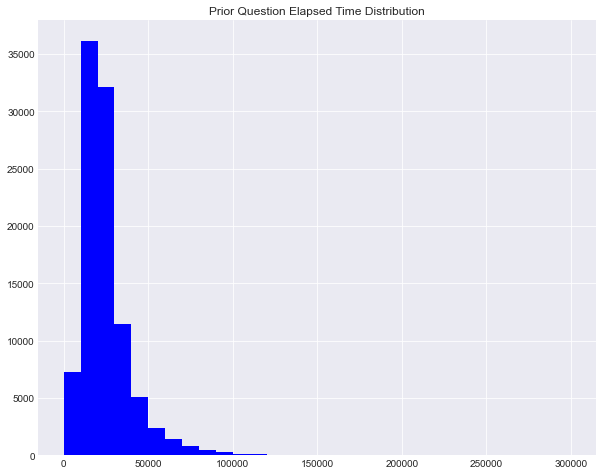

In [10]:
plt.figure(figsize=(10, 8))
plt.title("Prior Question Elapsed Time Distribution")
plt.hist(train_df['prior_question_elapsed_time'], color="blue", bins=30)
plt.show()

In [11]:
train_df["prior_question_had_explanation"].unique()

<BooleanArray>
[<NA>, False, True]
Length: 3, dtype: boolean

In [12]:
train_df["answered_correctly"].unique()

array([ 1,  0, -1], dtype=int8)

Имеем 3 класса для прогнозирования

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   timestamp                       100000 non-null  int64  
 1   user_id                         100000 non-null  int32  
 2   content_id                      100000 non-null  int16  
 3   content_type_id                 100000 non-null  int8   
 4   task_container_id               100000 non-null  int16  
 5   answered_correctly              100000 non-null  int8   
 6   prior_question_elapsed_time     97834 non-null   float32
 7   prior_question_had_explanation  99652 non-null   boolean
dtypes: boolean(1), float32(1), int16(2), int32(1), int64(1), int8(2)
memory usage: 2.3 MB


In [14]:
mean_t = train_df['prior_question_elapsed_time'].mean()

In [15]:
train_df['prior_question_elapsed_time'].fillna(mean_t, inplace=True)
train_df['prior_question_elapsed_time'].isna().sum()

0

In [16]:
train_df['prior_question_had_explanation'].value_counts().index

Index([True, False], dtype='object')

In [17]:
train_df['prior_question_had_explanation'].fillna(True, inplace=True)
train_df['prior_question_had_explanation'].isna().sum()

0

In [18]:
train_df['prior_question_had_explanation'].value_counts()

True     90697
False     9303
Name: prior_question_had_explanation, dtype: Int64

In [19]:
train_df[['prior_question_had_explanation']] = train_df[['prior_question_had_explanation']].astype(int)
train_df.head()

timestamp  user_id  content_id  content_type_id  task_container_id  \
0          0      115        5692                0                  1   
1      56943      115        5716                0                  2   
2     118363      115         128                0                  0   
3     131167      115        7860                0                  3   
4     137965      115        7922                0                  4   

   answered_correctly  prior_question_elapsed_time  \
0                   1                 24715.390625   
1                   1                 37000.000000   
2                   1                 55000.000000   
3                   1                 19000.000000   
4                   1                 11000.000000   

   prior_question_had_explanation  
0                               1  
1                               0  
2                               0  
3                               0  
4                               0

In [20]:
X = train_df.loc[:, train_df.columns != 'answered_correctly']
Y = train_df.loc[:, train_df.columns == 'answered_correctly']

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [22]:
RANDOM_SEED = 42

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_not_train, y_train, y_not_train = train_test_split(X, Y, test_size= 3/7, 
                                                    shuffle=True, stratify= Y,
                                                    random_state=RANDOM_SEED)

X_test, X_val, y_test, y_val = train_test_split(X_not_train, y_not_train, test_size= 1/3, 
                                                    shuffle=True, stratify= y_not_train,
                                                    random_state=RANDOM_SEED)

In [24]:
X_train.shape, X_val.shape, X_test.shape

((57142, 7), (14286, 7), (28572, 7))

Import the models:


In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

Let's take 4 classifiers (1 of a kind) with default parameters and check how well they can perform.

In [26]:
clf1 = KNeighborsClassifier()
clf2 = LogisticRegression()
clf3 = DecisionTreeClassifier()
clf4 = RandomForestClassifier()

default_classifiers = [clf1, clf2, clf3, clf4]

Fit each classifier on X_train, y_train, predict on X_test


In [27]:
clf_predictions = []
for clf in default_classifiers:
    clf.fit(X_train, y_train)  
    pred = clf.predict(X_test)
    clf_predictions.append(pred)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Apply 5 metrics to each prediction:

In [30]:
accuracies = [accuracy_score(y_test, pred) for pred in clf_predictions]
micro_precisions = [precision_score(y_test, pred, average="micro", zero_division=1) for pred in clf_predictions] 
micro_recalls = [recall_score(y_test, pred, average='micro', zero_division=1) for pred in clf_predictions]
macro_precisions = [precision_score(y_test, pred, average="macro", zero_division=1) for pred in clf_predictions]
macro_recalls = [recall_score(y_test, pred, average='macro', zero_division=1) for pred in clf_predictions]

scores = [accuracies, micro_precisions, micro_recalls, macro_precisions, macro_recalls]
names = ["Accuracies", "Micro-Precisions", "Micro-Recalls",  "Macro-Precisions", "Macro-Recalls"]

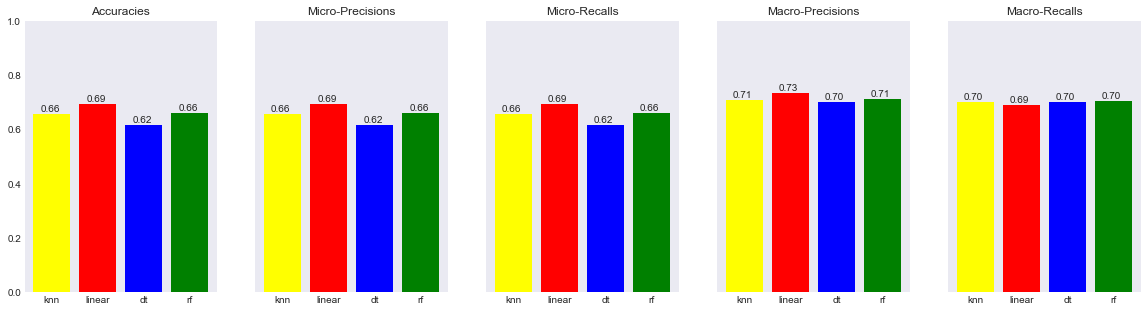

In [31]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 5), sharey=True)
plt.setp(axs, ylim=(0, 1))

xlabels = ["knn", "linear", "dt", "rf"]
colors = ["yellow", "red", "blue", "green"]
xticks = 1 + np.arange(len(xlabels))

for ax, score, name in zip(axs, scores, names):
    ax.bar(xticks, score, color=colors)
    for i, v in enumerate(score):
        ax.text(xticks[i] - 0.25, v + 0.01, "{:.2f}".format(v))
    ax.set_xticks(xticks)
    ax.set_xticklabels(xlabels)
    ax.set_title(name)
    ax.grid()

plt.show()

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

**KNeighborsClassifier**

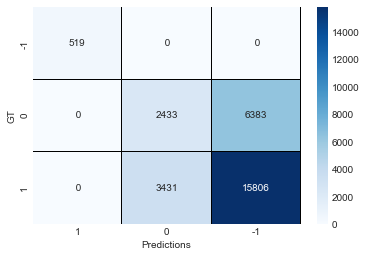

In [33]:
weakest_model_index = 0

dt_preds = clf_predictions[weakest_model_index]
conf_matrix = confusion_matrix(y_test, dt_preds)

plot_labels = sorted(Y['answered_correctly'].unique())

sns.heatmap(conf_matrix, 
            cmap="Blues",
            xticklabels=y_test['answered_correctly'].unique(),
            yticklabels=np.unique(dt_preds),
            linewidths=0.01, linecolor="black", 
            annot = True, fmt='2g')

plt.ylabel("GT")
plt.xlabel("Predictions")
plt.show()

**LogisticRegression**

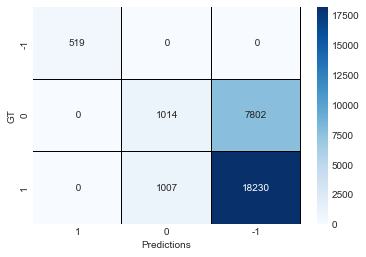

In [34]:
weakest_model_index = 1

dt_preds = clf_predictions[weakest_model_index]
conf_matrix = confusion_matrix(y_test, dt_preds)

plot_labels = sorted(Y['answered_correctly'].unique())

sns.heatmap(conf_matrix, 
            cmap="Blues",
            xticklabels=y_test['answered_correctly'].unique(),
            yticklabels=np.unique(dt_preds),
            linewidths=0.01, linecolor="black", 
            annot = True, fmt='2g')

plt.ylabel("GT")
plt.xlabel("Predictions")
plt.show()

**DecisionTreeClassifier**

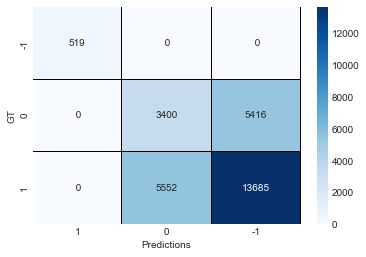

In [35]:
weakest_model_index = 2

dt_preds = clf_predictions[weakest_model_index]
conf_matrix = confusion_matrix(y_test, dt_preds)

plot_labels = sorted(Y['answered_correctly'].unique())

sns.heatmap(conf_matrix, 
            cmap="Blues",
            xticklabels=y_test['answered_correctly'].unique(),
            yticklabels=np.unique(dt_preds),
            linewidths=0.01, linecolor="black", 
            annot = True, fmt='2g')

plt.ylabel("GT")
plt.xlabel("Predictions")
plt.show()

**RandomForestClassifier**

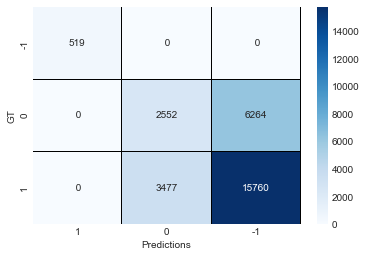

In [36]:
weakest_model_index = 3

dt_preds = clf_predictions[weakest_model_index]
conf_matrix = confusion_matrix(y_test, dt_preds)

plot_labels = sorted(Y['answered_correctly'].unique())

sns.heatmap(conf_matrix, 
            cmap="Blues",
            xticklabels=y_test['answered_correctly'].unique(),
            yticklabels=np.unique(dt_preds),
            linewidths=0.01, linecolor="black", 
            annot = True, fmt='2g')

plt.ylabel("GT")
plt.xlabel("Predictions")
plt.show()

### 1-D Grid Search

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

KNeighborsClassifier

In [38]:
knn_clf = KNeighborsClassifier()
knn_grid = {
    "n_neighbors": np.arange(1, 100)
}

In [39]:
knn_grid_searcher = GridSearchCV(knn_clf, knn_grid, cv=5, return_train_score=True)
knn_grid_searcher.fit(X_train, y_train)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\user\appdata\local\programs\python

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             return_train_score=True)

In [44]:
res = knn_grid_searcher.cv_results_
means = res['mean_test_score']
stds = res['std_test_score']

No handles with labels found to put in legend.


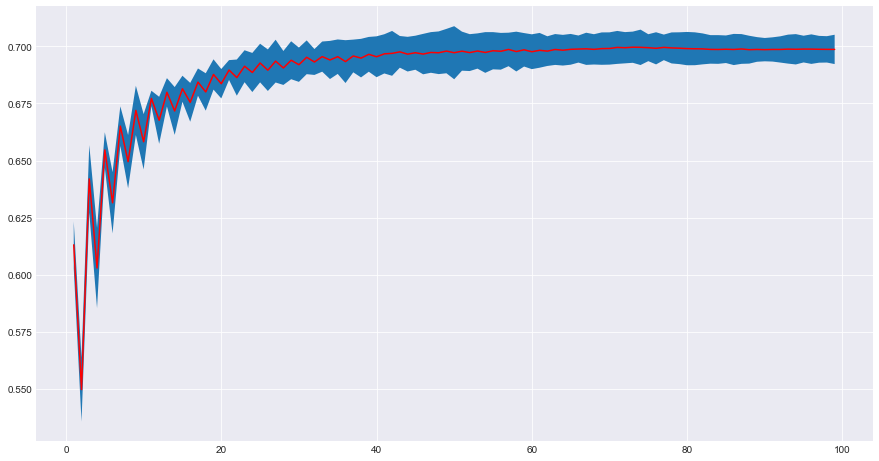

In [45]:
plt.figure(figsize=(15, 8))
xs = knn_grid_searcher.param_grid["n_neighbors"]
plt.plot(xs, means, color='red')
plt.fill_between(xs, means + 3 * stds, means - 3 * stds)
plt.legend()
plt.show()

In [46]:
print("Best estimator:", knn_grid_searcher.best_estimator_, "its score:", knn_grid_searcher.best_score_)

Best estimator: KNeighborsClassifier(n_neighbors=73) its score: 0.6996254331922126


DecisionTreeClassifier

In [40]:
tree_clf = DecisionTreeClassifier()
tree_grid = {
    "max_depth": np.arange(1,100)
}

In [41]:
tree_grid_searcher = GridSearchCV(tree_clf, tree_grid, cv=5, return_train_score=True)
tree_grid_searcher.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             return_train_score=True)

In [42]:
res_tree = tree_grid_searcher.cv_results_
tree_means = res_tree['mean_test_score']
tree_stds = res_tree['std_test_score']

No handles with labels found to put in legend.


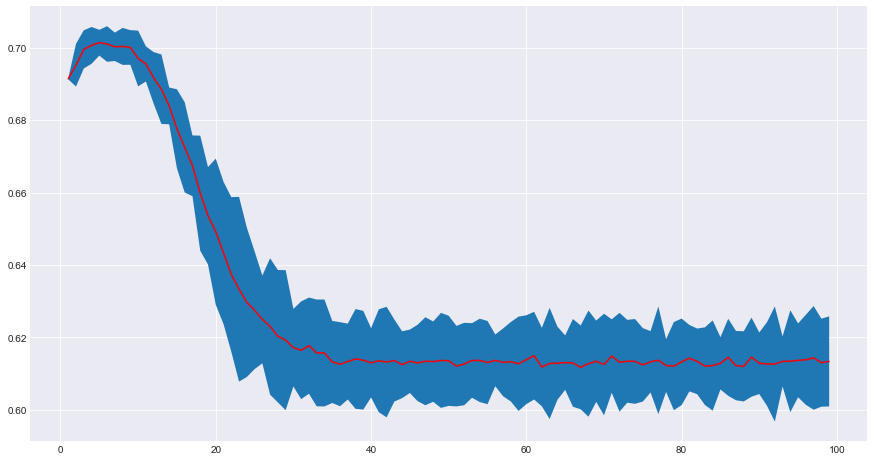

In [43]:
plt.figure(figsize=(15, 8))
xs = tree_grid_searcher.param_grid["max_depth"]
plt.plot(xs, tree_means, color='red')
plt.fill_between(xs, tree_means + 3 * tree_stds, tree_means - 3 * tree_stds)
plt.legend()
plt.show()

In [47]:
print("Best estimator:", tree_grid_searcher.best_estimator_, "its score:", tree_grid_searcher.best_score_)

Best estimator: DecisionTreeClassifier(max_depth=5) its score: 0.7014104902900232


RandomForest

In [48]:
forest_clf = RandomForestClassifier()
forest_grid = {
    "n_estimators": np.arange(10,100)
}

In [49]:
forest_grid_searcher = GridSearchCV(forest_clf, forest_grid, cv=5, return_train_score=True)
forest_grid_searcher.fit(X_train, y_train)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\user\appdata\local\programs\python\py

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
       95, 96, 97, 98, 99])},
             return_train_score=True)

No handles with labels found to put in legend.


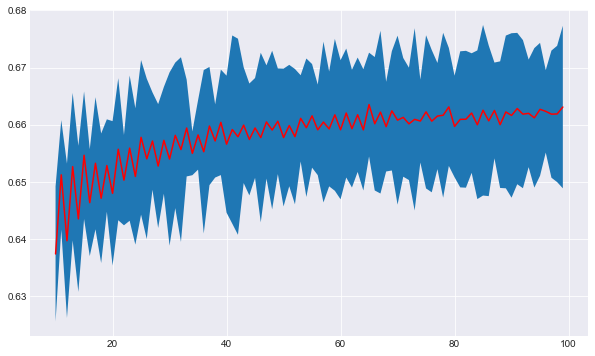

In [50]:
res_forest = forest_grid_searcher.cv_results_
forest_means = res_forest['mean_test_score']
forest_stds = res_forest['std_test_score']

plt.figure(figsize=(10, 6))
xs = forest_grid_searcher.param_grid["n_estimators"]
plt.plot(xs, forest_means, color='red')
plt.fill_between(xs, forest_means + 3 * forest_stds, forest_means - 3 * forest_stds)
plt.legend()
plt.show()

In [51]:
print("Best estimator:", forest_grid_searcher.best_estimator_, "its score:", forest_grid_searcher.best_score_)

Best estimator: RandomForestClassifier(n_estimators=65) its score: 0.663540029963262


### 2D GridResearch

KNeighborsClassifier

In [52]:
knn_clf = KNeighborsClassifier()
knn_grid = {
    "n_neighbors": np.arange(70,80),
    "metric": ('euclidean', 'manhattan', 'chebyshev')
}

In [53]:
knn_grid_searcher = GridSearchCV(knn_clf, knn_grid, cv=5, return_train_score=True)
knn_grid_searcher.fit(X_train, y_train)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\user\appdata\local\programs\python

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ('euclidean', 'manhattan', 'chebyshev'),
                         'n_neighbors': array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79])},
             return_train_score=True)

In [54]:
print("Best estimator:", knn_grid_searcher.best_estimator_, "its score:", knn_grid_searcher.best_score_)

Best estimator: KNeighborsClassifier(metric='manhattan', n_neighbors=71) its score: 0.7000979537558556


Decision Tree

In [55]:
tree_clf = DecisionTreeClassifier()
tree_grid = {
    "max_depth": np.arange(1,10),
    "criterion": ('gini', 'entropy')
}

In [56]:
tree_grid_searcher = GridSearchCV(tree_clf, tree_grid, cv=5, return_train_score=True)
tree_grid_searcher.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             return_train_score=True)

In [57]:
print("Best estimator:", tree_grid_searcher.best_estimator_, "its score:", tree_grid_searcher.best_score_)

Best estimator: DecisionTreeClassifier(max_depth=5) its score: 0.7014104902900232


RandomForest

In [58]:
forest_clf = RandomForestClassifier()
forest_grid = {
    "n_estimators": np.arange(60,70),
    "max_features": np.arange(1,30)
}

In [59]:
forest_grid_searcher = GridSearchCV(forest_clf, forest_grid, cv=5, return_train_score=True)
forest_grid_searcher.fit(X_train, y_train)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\user\appdata\local\programs\python\py

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'n_estimators': array([60, 61, 62, 63, 64, 65, 66, 67, 68, 69])},
             return_train_score=True)

In [60]:
print("Best estimator:", forest_grid_searcher.best_estimator_, "its score:", forest_grid_searcher.best_score_)

Best estimator: RandomForestClassifier(max_features=1, n_estimators=63) its score: 0.6636274853378682
